# 📊 Data Science Job Salaries Dataset

This dataset provides salary insights for Data Science professionals across different years. It contains **11 columns**, detailing experience levels, employment types, company locations, and more.  

## 🔹 Column Descriptions  
✅ **`work_year`** – The year the salary was paid.  
✅ **`experience_level`** – The employee's experience level for that year (`EN` – Junior, `MI` – Mid-level, `SE` – Senior, `EX` – Executive).  
✅ **`employment_type`** – The type of employment (`FT` – Full-time, `PT` – Part-time, `CT` – Contract, `FL` – Freelance).  
✅ **`job_title`** – The specific job title (e.g., Data Scientist, ML Engineer, etc.).  
✅ **`salary`** – The total gross salary amount paid.  
✅ **`salary_currency`** – The currency of the salary (ISO 4217, e.g., USD, EUR, GBP).  
✅ **`salary_in_usd`** – The salary converted to US dollars.  
✅ **`employee_residence`** – The employee's country of residence (ISO 3166, e.g., US, DE, IN).  
✅ **`remote_ratio`** – The percentage of remote work:  
  - `0` – Fully on-site  
  - `50` – Hybrid  
  - `100` – Fully remote
    
✅ **`company_location`** – The employer's country (ISO 3166).  
✅ **`company_size`** – The company's size category:  
  - `S` – Small (less than 50 employees)  
  - `M` – Medium (50 to 250 employees)  
  - `L` – Large (250+ employees)  

📌 This dataset is valuable for analyzing salary trends, the impact of experience, remote work influence, and more. 🚀  

In [1]:
!pip install phik==0.12.4

import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from google.colab import files
import plotly.express as px
uploaded = files.upload()

pd.options.display.max_columns = None # полностью отображаем столбцы
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 13.8 MB/s eta 0:00:00


Saving ds_salaries.csv to ds_salaries.csv


# 📌 Exploring the data

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.info() # General information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [3]:
df.describe().T # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [4]:
df.describe(include='object').T # Descriptive statistics

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [5]:
df.nunique() # Сheck the number of unique values

,0
work_year,4
experience_level,4
employment_type,4
job_title,93
salary,815
salary_currency,20
salary_in_usd,1035
employee_residence,78
remote_ratio,3
company_location,72


In [6]:
illogical_combinations = df[df['salary'] < 50000]
illogical_combinations

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
40,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,100,NG,L
91,2023,SE,FT,Data Scientist,45000,EUR,48289,ES,0,ES,M
92,2023,SE,FT,Data Scientist,36000,EUR,38631,ES,0,ES,M
...,...,...,...,...,...,...,...,...,...,...,...
3728,2021,MI,FT,Data Scientist,39600,EUR,46809,ES,100,ES,M
3735,2021,EN,PT,AI Scientist,12000,USD,12000,BR,100,US,S
3739,2021,MI,FT,Data Engineer,38400,EUR,45391,NL,100,NL,L
3744,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,100,HR,S


In [7]:
df.head(10) # Display the first ten values

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


# 📌 Clean the data

In [8]:
df.isnull().sum() # Count the missing values

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [9]:
df.duplicated(keep=False).sum() # Check for duplicates


1715

In [10]:
df = df.drop_duplicates(keep='first') # Remove all duplicates and keep only one row for each unique set
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [11]:
print(df.dtypes)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


# 📌 Analytics

### 💰 Highest-Paying Positions  
What are the most lucrative job titles?  

### 📈 Salary Outliers  
Are there any salary outliers? In which positions?  

---

### 📝 Comment  
For salary analysis, we use the **median value**, as salaries within the same job title (`job_title`) can vary significantly—from very low to extremely high.  

The **mean salary** is sensitive to outliers. If a few employees have exceptionally high salaries (e.g., **$1M**), the average will be skewed upward, distorting the overall picture.  

On the other hand, the **median** provides a more accurate representation of actual salary levels, as it is not affected by rare, abnormally high values. This makes it a better metric for assessing salaries across different job titles.

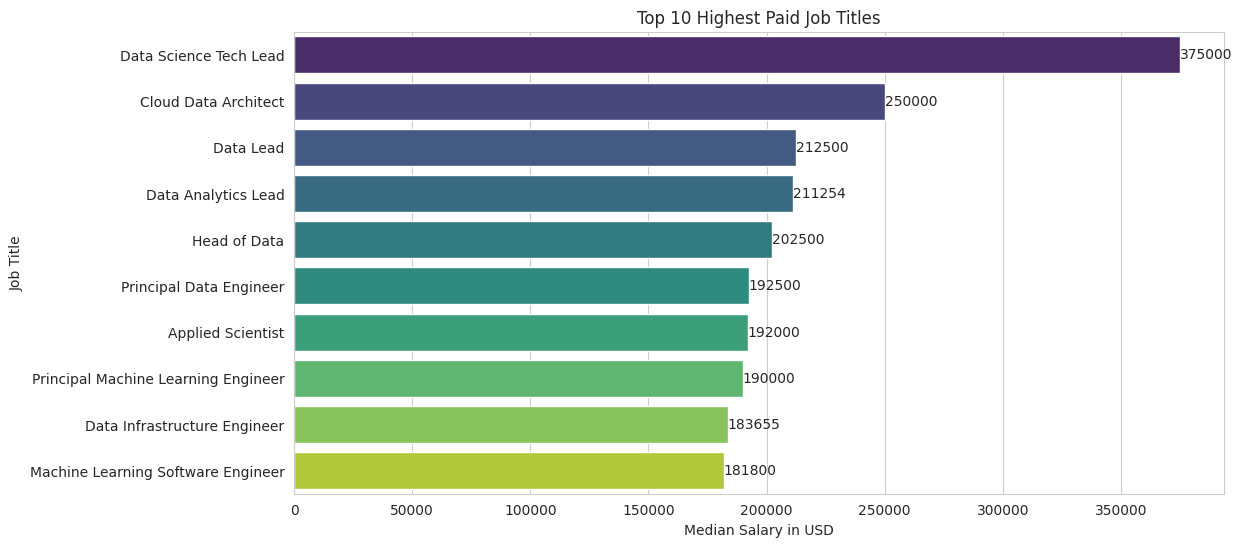

In [12]:
top_jobs = df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False).head(10) # Display the top 10 highest-paying positions
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Median Salary in USD")
plt.ylabel("Job Title")
plt.title("Top 10 Highest Paid Job Titles")
plt.show()

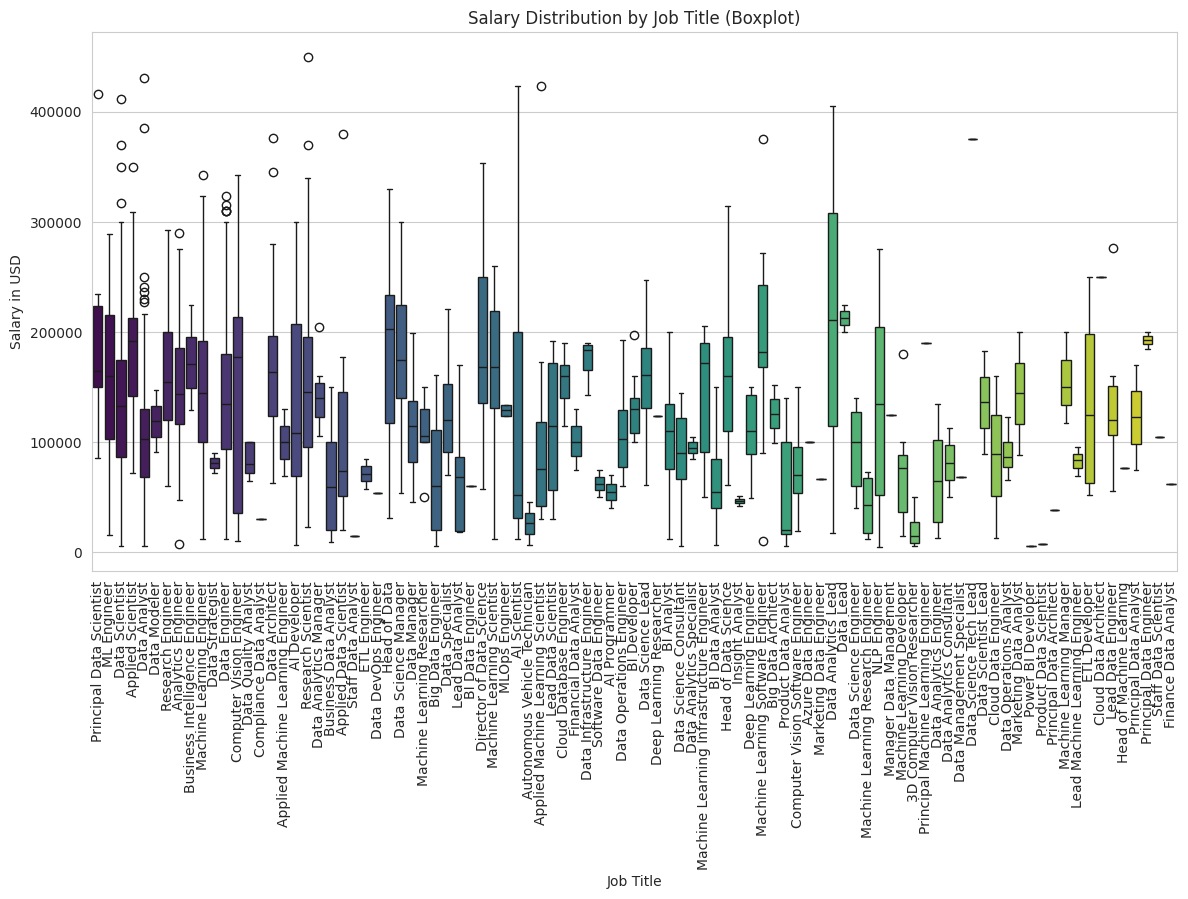

In [13]:
plt.figure(figsize=(14, 7))   # Examining the salary distribution for each job title.
sns.boxplot(data=df, x='job_title', y='salary_in_usd', palette='viridis')
plt.xticks(rotation=90)
plt.title("Salary Distribution by Job Title (Boxplot)")
plt.xlabel("Job Title")
plt.ylabel("Salary in USD")
plt.show()

The highest-paying position is **Data Science Tech Lead** with an annual salary of 375,000 USD. The second place goes to **Cloud Data Architect** with a salary of 250,000 USD, and the third to **Data Lead** with a salary of 212,500 USD.

There are salary outliers in the data. The largest outliers are observed for the positions of **ML Engineer, Data Analyst, and Data Engineer.**

### 🌍 Does remote work affect salary? Is there a correlation?

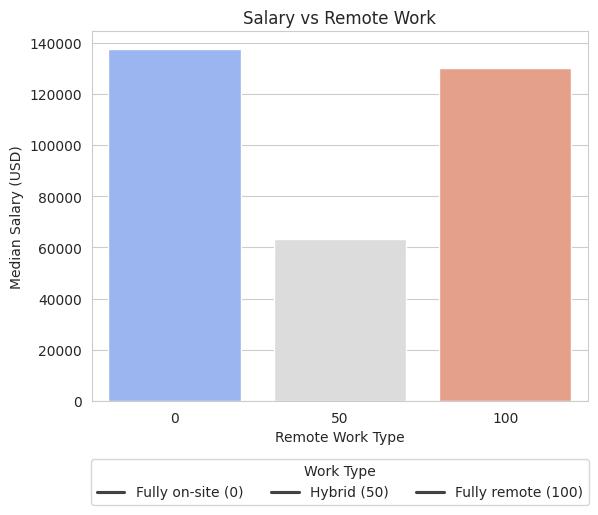

In [14]:
remote_salary = df.groupby('remote_ratio')['salary_in_usd'].median()
sns.barplot(x=remote_salary.index, y=remote_salary.values, palette="coolwarm")
plt.xlabel("Remote Work Type")
plt.ylabel("Median Salary (USD)")
plt.title("Salary vs Remote Work")
plt.legend(title="Work Type", labels=["Fully on-site (0)", "Hybrid (50)", "Fully remote (100)"], loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

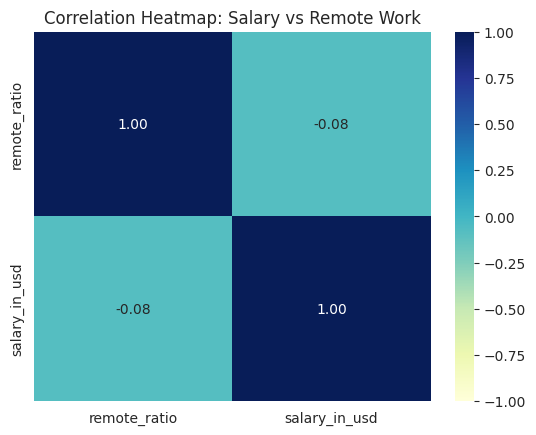

In [15]:
correlation_matrix = df[['remote_ratio', 'salary_in_usd']].corr() # Correlation between remote_ratio and salary_in_usdplt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, fmt=".2f", cbar=True)
plt.title("Correlation Heatmap: Salary vs Remote Work")
plt.show()

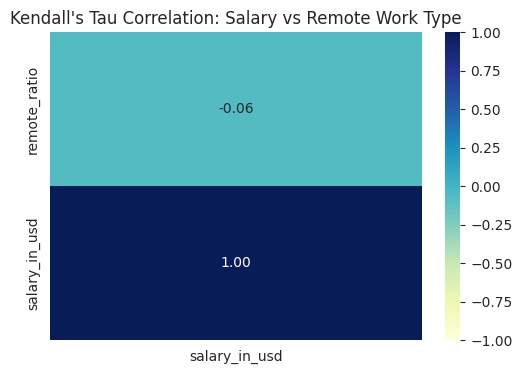

In [16]:
corr_kendall = df[['remote_ratio', 'salary_in_usd']].corr(method='kendall') # Correlation Kendall between remote_ratio and salary_in_usd
plt.figure(figsize=(6, 4))
sns.heatmap(corr_kendall[['salary_in_usd']], annot=True, cmap='YlGnBu', vmin=-1, vmax=1, fmt=".2f", cbar=True)
plt.title("Kendall's Tau Correlation: Salary vs Remote Work Type")
plt.show()

There is **no correlation** between salary and remote work.

### 💼 Salary vs Company Size

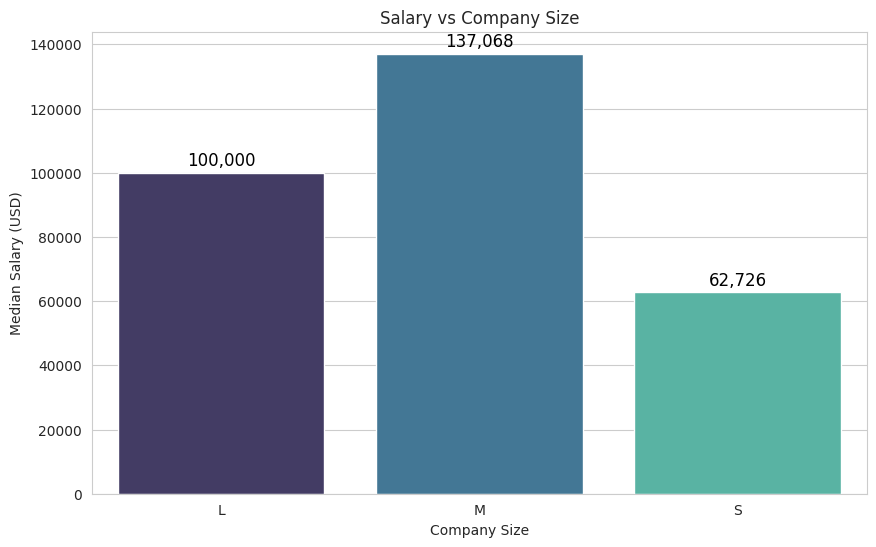

In [17]:
company_salary = df.groupby('company_size')['salary_in_usd'].median()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=company_salary.index, y=company_salary.values, palette="mako", ci=None)
for index, value in enumerate(company_salary.values):
    ax.text(index, value + 1000, f'{value:,.0f}', ha='center', va='bottom', fontsize=12, color='black')
plt.xlabel("Company Size")
plt.ylabel("Median Salary (USD)")
plt.title("Salary vs Company Size")
plt.show()

The highest average salary is in **medium-sized companies** - 137 068 USD.

### 📊 Most Popular Countries for Job Vacancies: Where Salaries Are Higher and Where They Are Lower

In [18]:
country_count = df['company_location'].value_counts().reset_index()
country_count.columns = ['Country', 'Vacancies']
fig = px.treemap(country_count,
                 path=['Country'],
                 values='Vacancies',
                 color='Vacancies',
                 color_continuous_scale='Viridis',
                 title='Vacancies by Country (Treemap)')

fig.show()

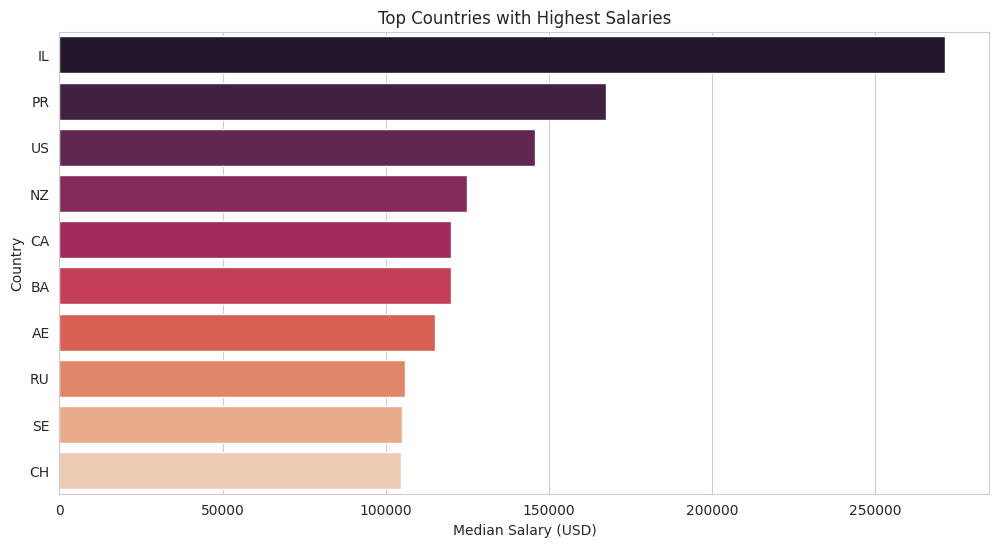

In [19]:
country_salary = df.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_salary.values, y=country_salary.index, palette="rocket")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Country")
plt.title("Top Countries with Highest Salaries")
plt.show()

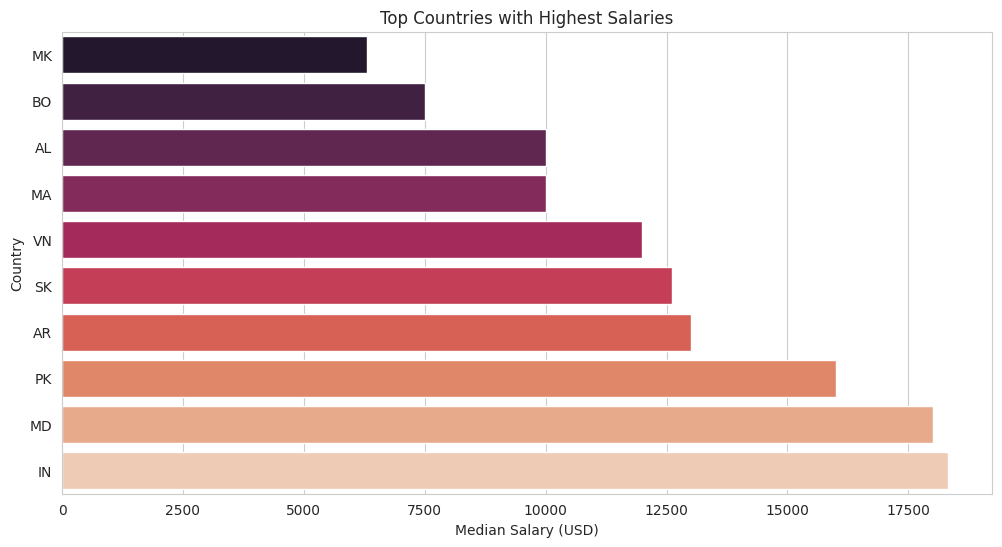

In [20]:
country_salary = df.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=True).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_salary.values, y=country_salary.index, palette="rocket")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Country")
plt.title("Top Countries with Highest Salaries")
plt.show()

**The United States** is the most popular country in terms of job vacancies with **1929** listings. **Israel** has the highest recorded median salary, while **North Macedonia** has the lowest median salary.

### 💸 Median Salary by Job Title

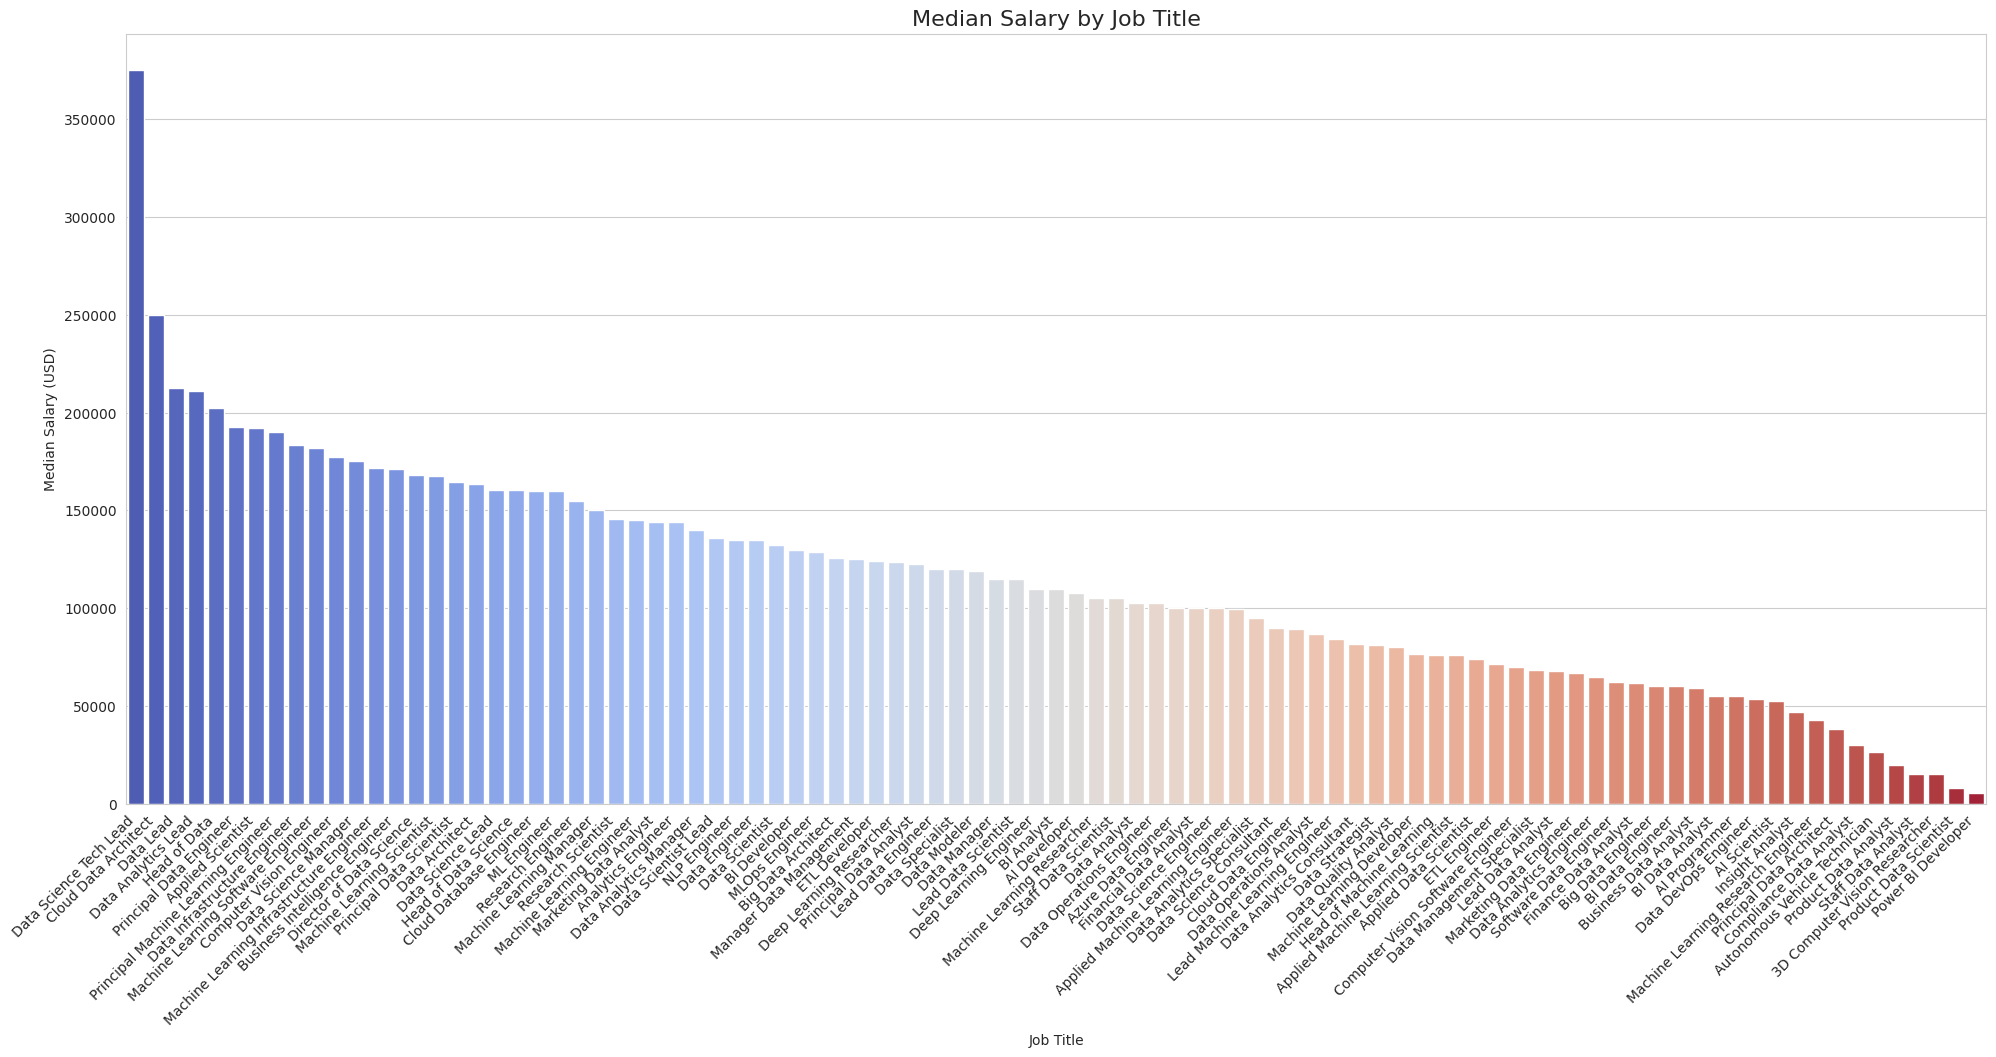

In [21]:
job_salary = df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)
plt.figure(figsize=(24, 10))
sns.barplot(x=job_salary.index, y=job_salary.values, palette="coolwarm")
plt.xlabel("Job Title")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary by Job Title", fontsize=16)  # Added money emoji to title
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

### 📈 Salary Trends by Job Title: 2020 vs 2023

In [37]:
df_median = df.groupby(['job_title', 'work_year'])['salary_in_usd'].median().unstack()
df_median['percent_change_23_to_20'] = ((df_median[2023] - df_median[2020]) / df_median[2020]) * 100
df_median = df_median.fillna(0).round(0).astype(int)
df_median = df_median[df_median['percent_change_23_to_20'] != 0]
df_median = df_median.sort_values(by='percent_change_23_to_20', ascending=False)
df_median

work_year,2020,2021,2022,2023,percent_change_23_to_20
job_title,,,,,
ML Engineer,15966,166682,160000,180000,1027
AI Scientist,45896,18053,162500,231232,404
Computer Vision Engineer,60000,24000,37367,212500,254
Machine Learning Infrastructure Engineer,50180,195000,148800,171600,242
Data Analyst,34784,71786,103320,108000,210
Data Scientist,62726,73000,130000,150000,139
Data Engineer,72134,82528,135000,145000,101
Data Science Consultant,54354,76833,94500,94000,73
Product Data Analyst,13036,0,120000,16414,26


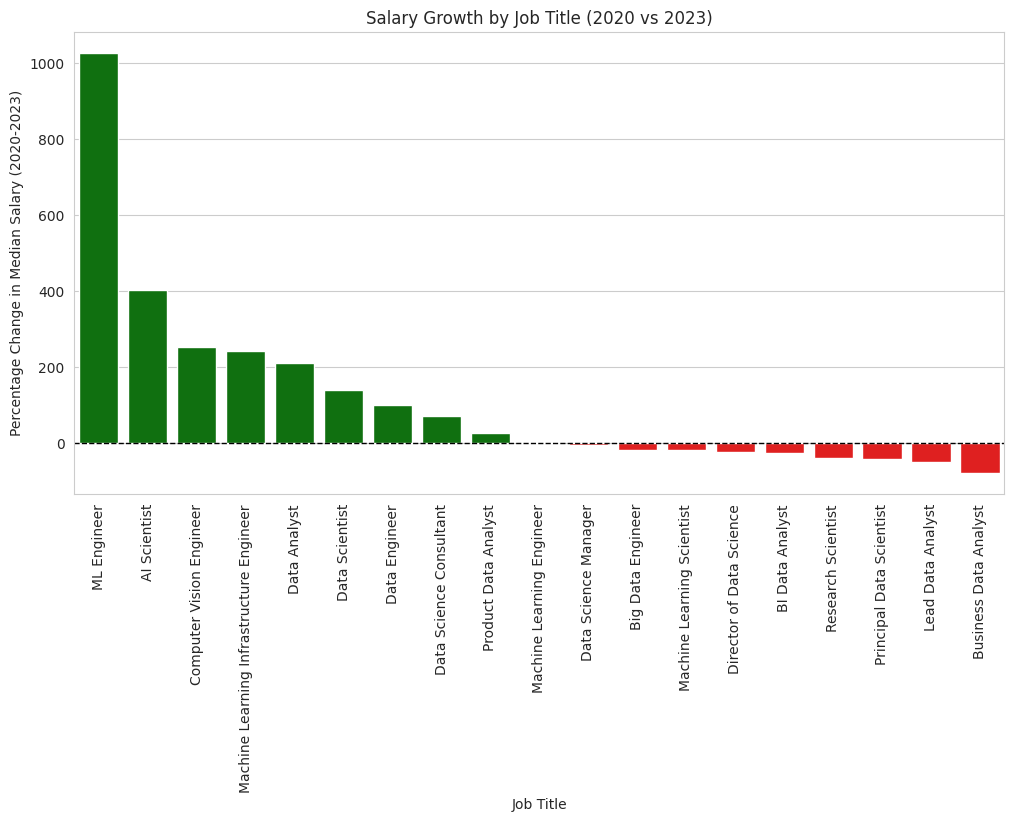

In [40]:
plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in df_median['percent_change_23_to_20']]
sns.barplot(x=df_median.index, y=df_median['percent_change_23_to_20'], palette=colors)
plt.ylabel("Percentage Change in Median Salary (2020-2023)")
plt.xlabel("Job Title")
plt.title("Salary Growth by Job Title (2020 vs 2023)")
plt.xticks(rotation=90)  # Поворачиваем подписи для удобства чтения
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)  # Линия на 0% для ориентира
plt.show()

Compared to 2020, the median salary changed for 19 professions in 2023.

🔼 **Highest** increase: ML Engineer (+1027%), AI Scientist (+404%), Computer Vision Engineer (+254%).

🔽 **Largest decrease:** Business Data Analyst (-79%), Lead Data Analyst (-50%), Principal Data Scientist (-42%).

### 🏆 Portrait of the Most Successful and Wealthy Employee


The most successful professional holds a leadership role (**Data Science Tech Lead, Cloud Data Architect, Data Lead)**, is based in **Israel, Puerto Rico, or the US**, works for a **mid-sized company**, and operates either **fully remotely** or **on-site full-time**.

### 📑 Work and Residence: Regional Analysis

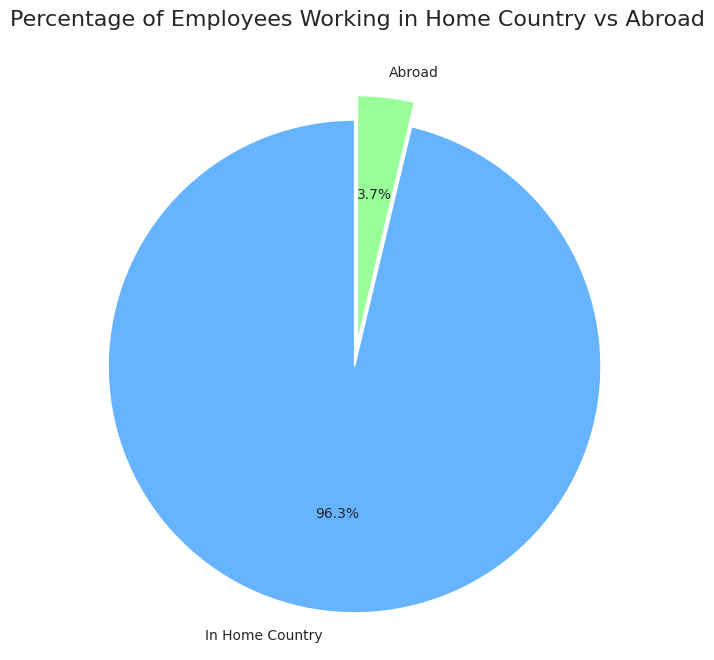

In [52]:
df['works_abroad'] = df['employee_residence'] != df['company_location'] # Count the number of employees working abroad and in their home country
abroad_counts = df['works_abroad'].value_counts()
abroad_percent = abroad_counts / abroad_counts.sum() * 100
plt.figure(figsize=(8, 8))
plt.pie(abroad_percent, labels=['In Home Country', 'Abroad'], autopct='%1.1f%%',
        colors=['#66b3ff', '#99ff99'], startangle=90, explode=(0.1, 0))
plt.title('Percentage of Employees Working in Home Country vs Abroad', fontsize=16)
plt.show()

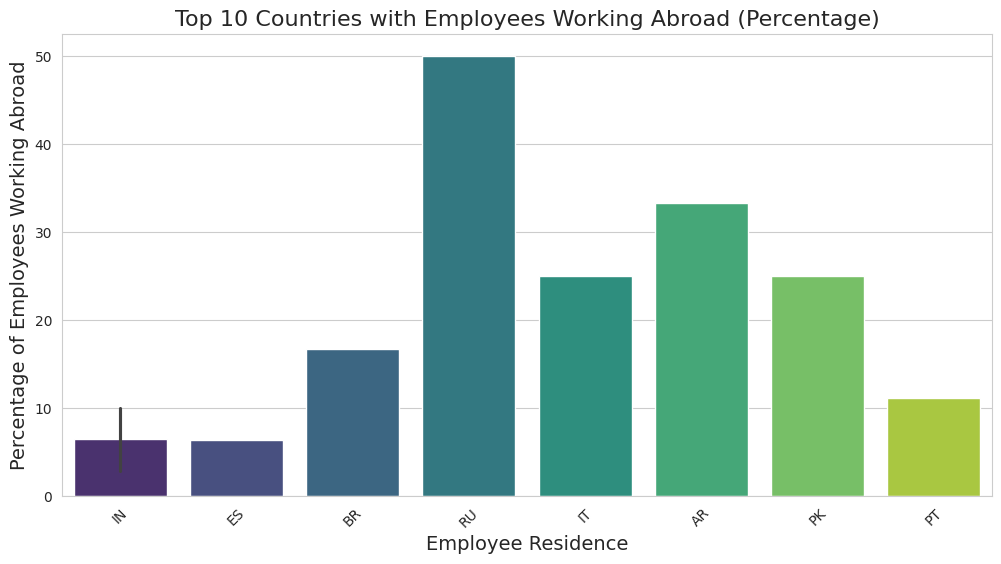

In [58]:
country_counts = df.groupby(['employee_residence', 'company_location']).size().reset_index(name='count') # Count countries with employees working abroad
abroad_countries = country_counts[country_counts['employee_residence'] != country_counts['company_location']]
top_abroad = abroad_countries.sort_values(by='count', ascending=False).head(10)
total_employees = df['employee_residence'].value_counts()
top_abroad['percent_abroad'] = (top_abroad['count'] / top_abroad['employee_residence'].map(total_employees)) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x='employee_residence', y='percent_abroad', data=top_abroad, palette='viridis')
plt.title('Top 10 Countries with Employees Working Abroad (Percentage)', fontsize=16)
plt.xlabel('Employee Residence', fontsize=14)
plt.ylabel('Percentage of Employees Working Abroad', fontsize=14)
plt.xticks(rotation=45)
plt.show()

According to the analysis, **96.3%** of employees work in their country of residence. However, among those who work remotely for companies in other countries, **Russia** shows the highest rate at **50%**, with **Argentina** and **Italy** taking second and third place, respectively.